# Rotinas para plotagem dos gráficos com as componentes do Campo Geomagnéticos observados em VSS e suas variações seculares

*Importando as bibliotecas necessárias

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import glob
import pandas as pd
import math as math
import os

In [50]:
VSS= np.loadtxt(fname='media_anual_VSS.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7))

In [55]:
igrf = np.loadtxt(fname='igrf_vassouras.csv', delimiter=',')

# Obtenção da variação secular (VS) de cada componete do campo principal.

### Usando a função `sec_var(a)` iremos determinar para cada compnente (x,y, z, f, i, h e d)

*Os cálculos foram feitos para os dados de vassouras e tbem para o modelo igrf (nesse já havia os valores de VS, entretanto não parecia muito confiável).

In [56]:
def sec_var(a):
    "determine secular variation for components of geomagnetic field."
    '''
    a - column data
    '''
    
    N = a.size
    sv = np.zeros(N)
    
    for i in range(N-1):
        sv[i+1] = a[i+1] - a[i]
    
    return sv

In [57]:
#SECULAR VARIATION FOR VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2015:
  
sv_d = sec_var(VSS[:,1])
sv_i = sec_var(VSS[:,2])
sv_x = sec_var(VSS[:,4])
sv_y = sec_var(VSS[:,5])
sv_z = sec_var(VSS[:,6])
sv_f = sec_var(VSS[:,7])

# Gráficos 

*Testando as dimensões dos eixos X e Y

In [59]:
yr=VSS[:,0]
print('yr', len(yr))
d = VSS[:,1]
print('D', len(d))
igrf_d=igrf[:,1]
print('igrf',len(igrf))

yr 101
D 101
igrf 101


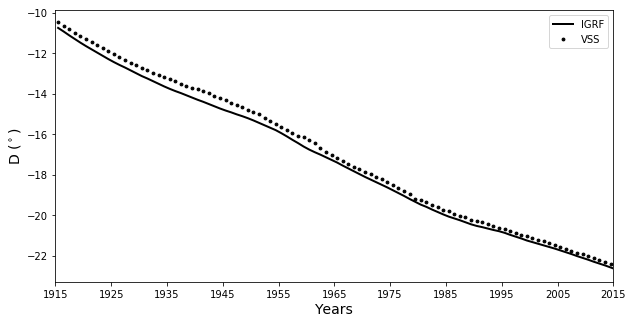

In [68]:
yr= VSS[:,0]
decli = VSS[:,1]
d= decli/60
igrf_d = igrf[:,1]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,d , 8, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_d, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('Declination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('D ($^\circ)$', fontsize=14)
plt.xlabel('Years', fontsize=14)
#plt.ylabel('Declination (degree)')
#plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()

fig.savefig('D.png', dpi=300)

#plt.grid(True)

#pylab.ylim([15000,25000])

#plt.savefig('Z_1915-2015.png', bbox_inches='tight',dpi=500)
#plt.show()

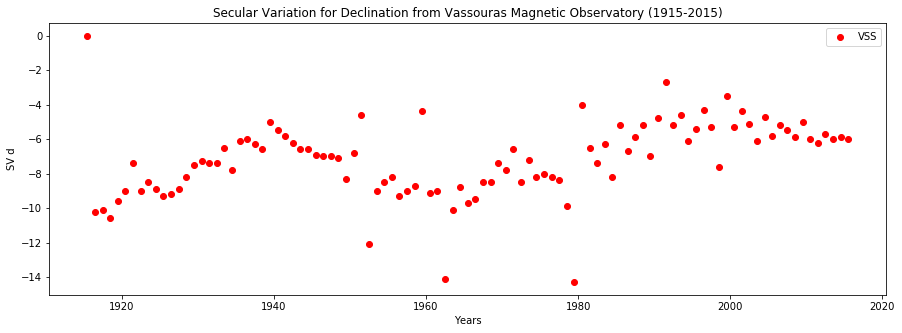

In [75]:
yr= VSS[:,0]
sv_x = sec_var(VSS[:,1])
#igrf_svd = sec_var(igrf[:,1])

fig = plt.figure(figsize=(15.0, 5.0))

Vass = plt.scatter(yr,sv_x, label="VSS", color='red')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('SV d')
plt.xlabel('Years')
plt.show()

fig.savefig('SV_D.png', dpi=300)